# Machine Learning: Assignment 2
## KMeans clustering (max. 7p)

**Remember** to write your information below.

In [20]:
# TODO: Write your information here!
student_name = 'Student name'
student_id = "JAMK's student ID"

## Assignment 2.0: KMeans exercise
### Unsupervised learning
In the exercise, three (3) distinct clusters are generated using **synthetic values** of X and y coordinates.

These can be drawn in the (X,Y) coordinate system.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def k_mean_distance(data, cx, cy, i_centroid, cluster_labels):    
    #  TODO: Function implementation to calculate the mean of distances of cluster centroids
    pass


## Assignment 2.1
### Topic: Generation of synthetic data points (2 points)

Let's generate random data into a NumPy matrix and divide the array into the four (4) cluster of points.
* Each part includes **100** coordinate pairs. 
* The total number of elements in the array is **400 coordinate pairs**.

The points are generated, for example, with NumPy's function `np.random.rand()`.

The four cluster of points is generated with random numbers using the following *calculation formulas*:

* **100** points with (x, y) values between **[-1, 0]**
* **100** points with (x, y) values between **[1, 2]**
* **100** points with (x, y) values between **[3, 4]**
* **100** points with (x, y) values between **[3.5, 4.5]**

In [22]:
import numpy as np

# Generate 100 points for each cluster with specified ranges
cluster1 = np.random.rand(100, 2) * [-1, 0] + [-1, 0]  # Points between [-1, 0]
cluster2 = np.random.rand(100, 2) * [1, 1] + [1, 2]    # Points between [1, 2]
cluster3 = np.random.rand(100, 2) * [1, 1] + [3, 4]    # Points between [3, 4]
cluster4 = np.random.rand(100, 2) * [1, 1] + [3.5, 4.5] # Points between [3.5, 4.5]

# Combine all clusters into a single array
X = np.vstack((cluster1, cluster2, cluster3, cluster4))

# Shuffle the combined array to mix up the points from different clusters
np.random.shuffle(X)

# Print the size of the array to verify it contains 400 points
print(f"Length of matrix: {len(X)}")


Length of matrix: 400


## Assignment 2.2
### Topic: K-Means clustering and plotting (2 points)

Perform **clustering** on the dataset using the `cluster` module of `scikit-learn` library
[k-means method](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.k_means.html).

When using the **KMeans** algorithm, the number of possible clusters can be set in advance, but here the algorithm is run with defaults.

Additional tip you should try in this exercise:

The algorithm of the **KMeans** machine learning model can be tuned in a variety of ways (the same applies to other ML implementations of sklearn) by changing the parameters.

     KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
      n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
      random_state=None, tol=0.0001, verbose=0)``

In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
optimal_number_of_clusters = 4
kmeans = KMeans(n_clusters=optimal_number_of_clusters, n_init=10, random_state=0)
kmeans.fit(X)


KMeans(n_clusters=4, n_init=10, random_state=0)

Let's find the center points (**centroids**) of the clusters.
Hint: `cluster_centers_`

In [24]:
#Retrieve cluster centers (centroids)
centroids = kmeans.cluster_centers_

# The center points of the clusters and their number are printed out
print(f"Number of centroids {len(centroids)} and positions: {centroids}")

Number of centroids 4 and positions: [[ 3.99291966e+00  4.97052011e+00]
 [ 1.50026493e+00  2.49074021e+00]
 [-1.50694439e+00 -8.88178420e-16]
 [ 3.43544787e+00  4.42054237e+00]]


Drawing clusters and centroids

Let's plot all the data points using a scatter plot.
* the calculated center points are plotted
Hint: `plt.scatter`

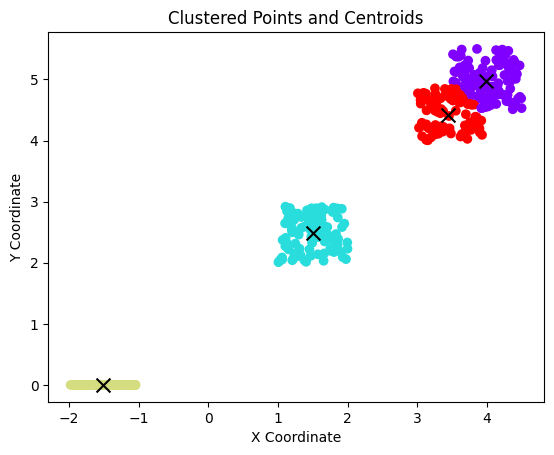

In [25]:
# TODO: Plot the points as a scatter plot
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='rainbow')
# TODO: plot the calculated centroids
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', s=100)
plt.title('Clustered Points and Centroids')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

## Assignment 2.3
### Topic: K-Means clustering - setting the number of cluster centroids (2 points)

Set the number of cluster centroids to *optimal number* of clusters.
The optimal number of clusters can be seen by examining the distribution of points using the figure.

In [26]:
from sklearn.cluster import KMeans

# Calculate WCSS for different numbers of clusters
wcss = []
for i in range(1, 11):  # Test 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS for the fitted data
# The center points of the clusters and their number are printed
print(f"Number of centroids {len(centroids)} and positions: {centroids}")

Number of centroids 4 and positions: [[ 3.99291966e+00  4.97052011e+00]
 [ 1.50026493e+00  2.49074021e+00]
 [-1.50694439e+00 -8.88178420e-16]
 [ 3.43544787e+00  4.42054237e+00]]


#### Visualize: Drawing clusters and centroids

Let's plot all the data points using a scatter plot.
* the calculated centroids are plotted
Hint: `plt.scatter`

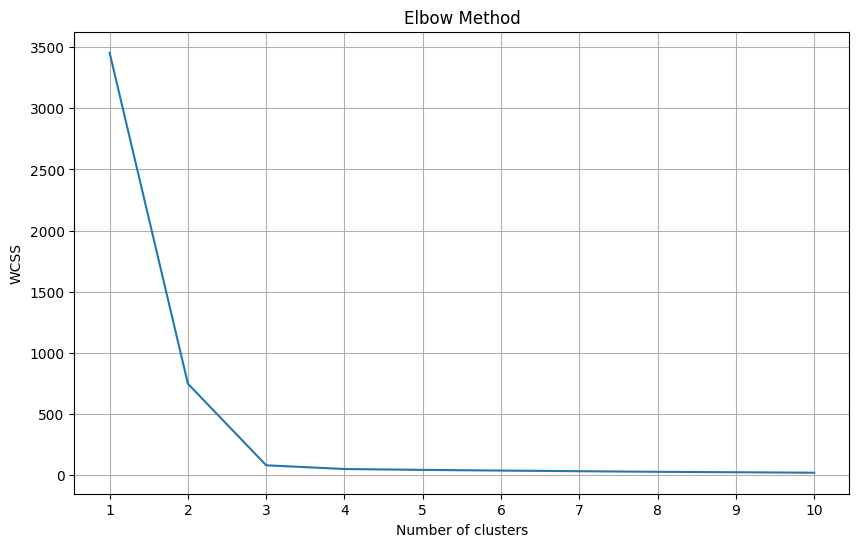

In [27]:
# Plot the results in a line graph to observe the 'elbow'
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


## Assignment 2.4:
### Topic: Cluster distances as a line diagram (1 p)

Let's plot the average distances of the points of the clusters from the center of the cluster.
* implement the *k_mean_distance()* function given at the beginning of this document is used for drawing


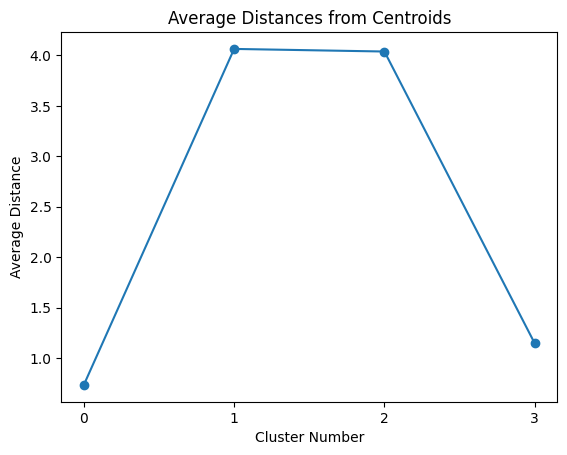

In [28]:
def k_mean_distance(data, cx, cy, labels, cluster_number):
    # Selecting the data points belonging to the specified cluster
    relevant_data = data[labels == cluster_number]
    # Calculating the distance of each point in the cluster to the centroid
    distances = np.sqrt((relevant_data[:, 0] - cx) ** 2 + (relevant_data[:, 1] - cy) ** 2)
    # Returning the mean distance
    return np.mean(distances)

# Calculate average distances for each cluster
distances_from_center = [k_mean_distance(X, centroids[i, 0], centroids[i, 1], kmeans.labels_, i) for i in range(centroids.shape[0])]

# Plotting the average distances
plt.plot(distances_from_center, marker='o')
plt.title('Average Distances from Centroids')
plt.xlabel('Cluster Number')
plt.ylabel('Average Distance')
plt.xticks(range(len(distances_from_center)))  # Set x-ticks to match the number of clusters
plt.show()
